# CP321 Final Project
### Student Information
* Andrew Liutiev | 180635320 | liut5320@mylaurier.ca

### Project Infromation
* Question
    * In the year 2020, how has COVID-19 impacted Canada's unemployment rate accross the Country and how was Ontario affected by the outbreak?
* Description
    * I wanted to cover a topic that was relevant to today's society and had an impact on me. At the beginning of the COVID-19 outbreak, my summer coop placement got rescinded and I was left unemployed due to COVID-19. The unemployment data below covers 2020 and the COVID-19 data has been adjusted to match the date range of the unemployment data. The idea behind the question stems from choosing a relevant idea impacting society & getting a better understanding of the impact of COVID-19 in Canada.
* Unemployment data
    * This data set 
    * Source: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410035401
* Covid-19 data 
    * This data set contained many columns regarding deaths, numbers recovered, tests, confirmed cases and more.
    * Source: https://www150.statcan.gc.ca/n1/pub/13-26-0003/132600032020001-eng.htm
    





### Importing
#### Note: Data does not include data on territories
* Sets constant values for province & country filter
* Reading files & initializing data frames
* Includes import check to see what columns names are included within the data sets


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PROVINCES = ["Ontario", 
             "Quebec", 
             "New Brunswick", 
             "Newfoundland and Labrador", 
             "Nova Scotia", 
             "Prince Edward Island", 
             "Manitoba", 
             "Saskatchewan", 
             "Alberta", 
             "British Columbia",
             "Canada"]


df1 = pd.read_csv("data/statscan_unemployment.csv")
df2 = pd.read_csv("data/statscan_covid19.csv")

# import check
# print(df1.head())
# print(df2.head())

### Formatting
* Formats both CSVs for Unemployment & COVID-19
* Includes formatting check for column names & data entries included at the end of formatting


In [7]:
# ---------- UNEMPLOYMENT csv ----------
# filtering desired columns on geographic area (province), date & unemployment rate
# reformatting names to ensure merging compatibilty & restringing date/time lines
df1 = pd.DataFrame(df1, columns = ["GEO", "REF_DATE", "VALUE"])
df1 = df1[df1.GEO.isin(PROVINCES)]
df1 = df1.rename(columns={"GEO":"Province", "REF_DATE":"Date", "VALUE":"Unemployment Rate"})
df1['Date'] = pd.to_datetime(df1['Date']).dt.strftime('%Y-%m')

# ---------- COVID-19 csv ----------
# fitlering desired columns on province, dates & number of covid-19 cases
# reformatting names to ensure merging compaibility & restringing date/time lines
df2 = pd.DataFrame(df2, columns = ["prname", "date", "numconf"])
df2 = df2[df2.prname.isin(PROVINCES)]
df2 = df2.rename(columns={"prname": "Province", "date": "Date", "numconf":"Confirmed Cases"})
df2['Date'] = pd.to_datetime(df2['Date']).dt.strftime('%Y-%m')

# Grouping entries by provinces & dates, then finding the max entry within each month, dropping duplicate entries
max = df2.groupby(['Province', 'Date'])['Confirmed Cases'].transform('max') == df2['Confirmed Cases']
df2 = df2[max].drop_duplicates()

# formatting check
# print(df1.columns)
# print(df2.columns)
# print(df2.head())

### Merging
#### Note: COVID-19 case rate is converted to a percentage expressed as 10^-3 
* Merges both data sets from unemployment & covid-19
* Includes merge check for both before & after merge fields

* Canada 2020 population is estimated at 37,742,154 people at mid year according to UN data. Canada population is equivalent to 0.48% of the total world population.

In [165]:
# merging data frames on Province & Date fields filling empty values (NaN) with 0 values, resorting & reindexing values
# Then dropping dates past the last month of 2020 and coverting confirmed cases to a % value
df3 = df1.merge(df2, how='outer', on=['Province', 'Date']).fillna(0)
df3 = df3.sort_values(["Date", "Province"])
df3 = df3.reset_index(drop=True)
df3 = df3[df3["Date"] <= '2020-12']
df3['Case Count Rate'] = round((df3['Confirmed Cases'] / 37742154) * 1000, 2)



# data merge check
# print(df1.head(50))
# print(df2.head(50))
# print(df3.head(50))

### Plotting
* Plots both data sets from unemployment & covid-19 within Canada & Ontario
* Plots data on difference between

<AxesSubplot:title={'center':'Comparison of Unemployment & COVID-19 Cases (ON)'}, xlabel='Date', ylabel='%'>

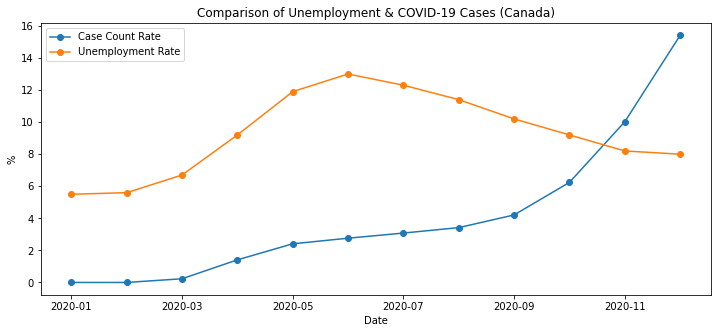

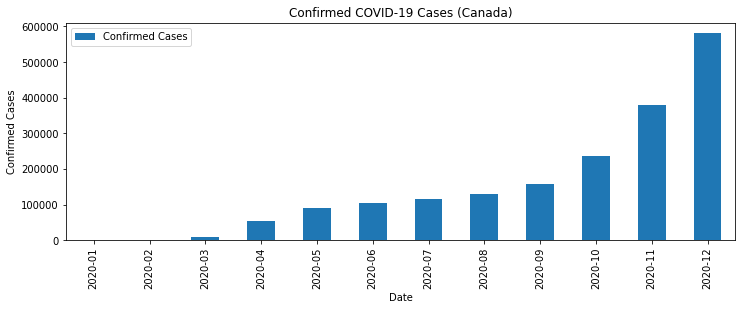

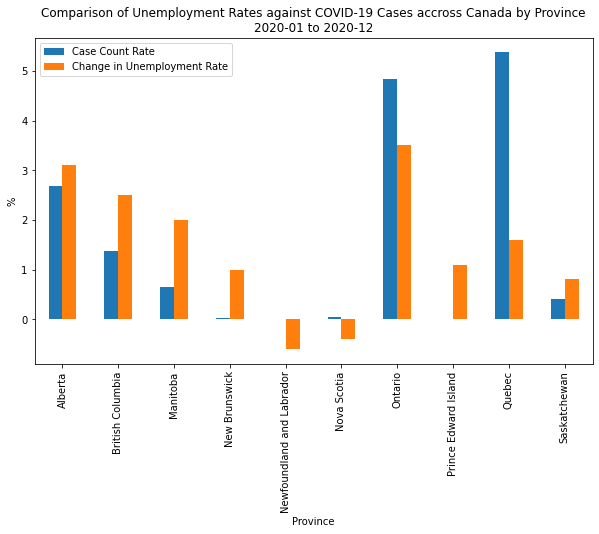

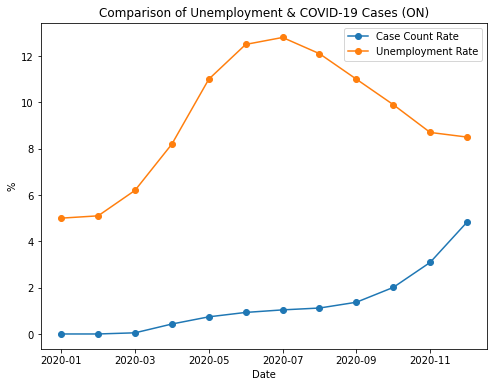

In [200]:
%matplotlib inline
# Filtering data to include striclty Canada or Ontario
df3_canada = df3[df3["Province"]=="Canada"]
df3_ontario = df3[df3["Province"]=="Ontario"]

# filtering start & end dates of the dataframes, then subtracting the difference in unemployment rates from the end of 2020 by the end
df3_ur_start = df3[(df3["Province"] !="Canada") & (df3["Date"] == '2020-01')].reset_index(drop=True)
df3_ur_end = df3[(df3["Province"] !="Canada") & (df3["Date"] == '2020-12')].reset_index(drop=True)
df3_ur_end["Start"] = df3_ur_start["Unemployment Rate"]
df3_ur_end["Change in Unemployment Rate"] = df3_ur_end["Unemployment Rate"] - df3_ur_end["Start"]

# All plots
df3_canada.plot(x="Date", y=['Case Count Rate', 'Unemployment Rate'], style='-o', title="Comparison of Unemployment & COVID-19 Cases (Canada)", ylabel="%", figsize=(12, 5))
df3_canada.plot.bar(x="Date", y="Confirmed Cases", figsize=(12, 4),  ylabel="Confirmed Cases", title="Confirmed COVID-19 Cases (Canada)")
df3_ur_end.plot.bar(x="Province", y=["Case Count Rate", "Change in Unemployment Rate"], ylabel="%", figsize=(10, 6), title="Comparison of Unemployment Rates against COVID-19 Cases accross Canada by Province\n2020-01 to 2020-12")
df3_ontario.plot(x="Date", y=['Case Count Rate', 'Unemployment Rate'], style='-o', title="Comparison of Unemployment & COVID-19 Cases (ON)", ylabel="%", figsize=(8, 6))

### Conclusion
* From the comparison between the Unemployment Rate & COVID-19 cases we can identify the trend that there is a slight positive correlation between the rise in COVID-19 cases and unemployment rates. As the number of COVID cases rises in Canada, our unemployment rises and as the year progressed Canadians managed to adapt and find employment.
* March of 2020 was when the first COVID-19 lockdown was implemented in Ontario. Viewing the bar graph on Confirmed COVID cases within Canada and comparing it with the previous grpah, we can also identify that the moment there was a significant rise in COVID-19 cases within Canada our unemployment rate started to rise.
* Looking at the maritime provinces such as Newfoundland & Labrador & Nova Scotia it appears that despite COVID-19 impacting the rest of Canada raising unemployment rates, they managed to remain largely unaffected with very few COVID-19 cases and the population within those provinces managed to find employment. It also appears that the maritime provinces had much fewer COVID-19 cases in comparison with the rest of the Country, Ontario & Quebec being the two provinces with the most cases however Alberta had the second highest rise in unemployment rates.
* Taking a look at the comparison between Unemployment Rates & COVID-19 cases within Ontario, there appears to be a stronger correlation of a rising uptrend beteween unemployment and cases of COVID-19. The rise in unemployment seems to follow a trend of rising as the change in COVID-19 cases started to rise in March of 2020.

Overall, the data found shows that there was a slight positive correlation between the rise in COVID-19 cases and the Unemployment rate accross the country. Aside from the maritime provinces, there seems to be a trend where any increase in COVID-19 Cases created a rise in unemployment by the end of 2020. The data gathered within Ontario directly coincides with my personal experience in March of 2020 and my loss of work. Perhaps once Canada can get the COVID-19 pandemic under control Canadians can go back to finding employment & unemployment rates will fall back to normal.

